# Class 4: Regression

In this class we will explore how to model an outcome variable in terms of input variable(s) using linear regression, principal component analysis and Gaussian processes.  After these activities you should be able to:

- generate a least-squares regression line to a dataset
- handle cases with errors in both co-ordinates
- perform a principal component analysis on a set of variables
- construct Gaussian Process models for interpolation

**Regression** describes any statistical method which determines a relationship between a **dependent** (outcome) variable $y$ and **independent** (predictor) variable(s) $x$.

## Least-squares linear regression

In **linear regression** we suppose the relationship is a straight line.  A standard method of determining that line is to **minimize the residuals** between it and the points.

Specifically, the **least-squares linear regression line** is the linear fit to a dataset $(x_i, y_i)$ that minimizes the sum of the squares of the $y$-residuals.

**With an intercept**, i.e. fitting the line $y = ax + b$:

$a = \frac{\sum_i x_i y_i - N \overline{x} \overline{y}}{(N-1) \sigma_x^2} = r \frac{\sigma_y}{\sigma_x}$

$b = \mu_y - a \, \mu_x$

**Without an intercept**, i.e. fitting the line $y = ax$:

$a = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

As well as the best-fitting line, we also need to quantify the **accuracy of the model**.  If we consider the **sum of the squared residuals** $SS_{res} = \sum_i (y_i - y_{mod,i})^2$ and the **total sum of squares** $SS_{tot} = \sum_i (y_i - \overline{y})^2$, we define the **coefficient of determination**

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

$R$ is exactly the same as the correlation coefficient $r$ we met in Class 2.

Let's determine the linear regression line for the test correlation dataset from Class 2.  Here's a code to perform this task:

Linear regression slope = 0.603505170178294
Linear regression intercept = 0.2080488830210434


(0.0, 1.0)

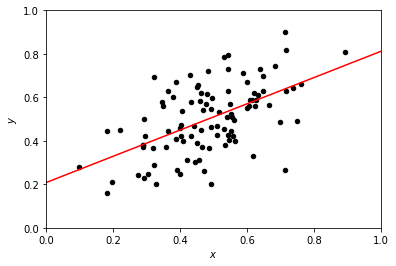

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Read in the example correlation dataset
# You will need to change the file path to the location where you've saved the data
data = np.loadtxt('../datasets/correlation_example.dat')
x,y = data[:,0],data[:,1]
# Perform linear regression on the dataset to determine the slope and intercept
result = stats.linregress(x,y)
a,b = result.slope,result.intercept
print('Linear regression slope =',a)
print('Linear regression intercept =',b)
# Plot the result
xmin,xmax,ymin,ymax = 0.,1.,0.,1.
plt.scatter(x,y,marker='o',s=20,color='black')
plt.plot([xmin,xmax],[a*xmin+b,a*xmax+b],color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

Let's compute the $R^2$ value and show it's the same as the correlation coefficient:

In [2]:
# Evaluate Pearson correlation coefficient r
r,p = stats.pearsonr(x,y)
# Evaluate the coefficient of determination R^2
xmu,ymu = np.mean(x),np.mean(y)
r2 = 1 - np.sum((y-(a*x+b))**2)/np.sum((y-ymu)**2)
# These should be equal
print('R^2 =',r2)
print('r^2 =',r**2)

R^2 = 0.30067842432276637
r^2 = 0.30067842432276654


## Activity

Returning to Hubble and Lemaitre's distance velocity datasets, find the **linear least-squares regression lines** with and without an intercept, and the value of $R^2$

## The case of errors in both co-ordinates

Note that linear regression with weights $w_i = 1/\sigma_i^2$ is equivalent to minimizing the $\chi^2$ statistic in a model fit.  A more general case is with **errors in both co-ordinates**.

One solution for cases with errors in both co-ordinates is to modify the function we are minimizing:

$\chi^2(a,b) = \sum_i \frac{(y_i - a x_i - b)^2}{\sigma_{y,i}^2 + a^2 \sigma_{x,i}^2}$

## Activity

Consider the example dataset containing the stellar masses and rotation velocities of galaxies.  Find the **best-fitting linear regression** by minimizing the above function, using the errors in both co-ordinates.

## Principal component analysis

Let's say we have a dataset which contains many variables for each object.  **Principal component analysis** (PCA) is a procedure which uses the correlations between the variables to identify _which combinations of variables capture most information about the dataset_.

Geometrically, it identifies the directions in which the cloud of variables is most elongated.

Mathematically, it determines the **eigenvectors** of the covariance matrix and sorts them in importance according to their corresponding **eigenvalues**.

In the following example we apply the procedure to the test correlation dataset.

In [3]:
from sklearn.decomposition import PCA

# Determine the eigenvalues and eigenvectors of the example correlation dataset
pca = PCA(n_components=2)
data = np.transpose(np.array([x,y]))
pca.fit(data)
eigval = pca.explained_variance_
eigvec = pca.components_
l1,l2 = eigval[0],eigval[1]
v1,v2 = eigvec[:,0],eigvec[:,1]
print('Eigenvalue 1 =',l1,'eigenvector 1 =',v1)
print('Eigenvalue 2 =',l2,'eigenvector 2 =',v2)

Eigenvalue 1 = 0.036600176954389524 eigenvector 1 = [0.64325113 0.76565526]
Eigenvalue 2 = 0.010500224305114374 eigenvector 2 = [ 0.76565526 -0.64325113]


Here's a plot of the data and eigenvector directions:

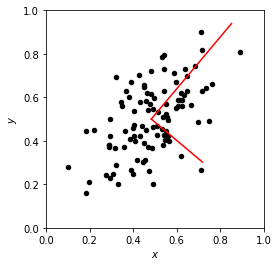

In [4]:
# Overplot the data and the eigenvector directions
plt.scatter(x,y,marker='o',s=20,color='black')
# Plot the 1st eigenvector with a length proportional to the 1st eigenvalue
l = 3.*np.sqrt(l1) # this scaling by "3" is arbitrary for visualisation purposes
dx,dy = l*v1[0],l*v1[1]
plt.plot([xmu,xmu+dx],[ymu,ymu+dy],color='red')
# Plot the 2nd eigenvector with a length proportional to the 2nd eigenvalue
l = 3.*np.sqrt(l2) # this scaling by "3" is arbitrary for visualisation purposes
dx,dy = l*v2[0],l*v2[1]
plt.plot([xmu,xmu+dx],[ymu,ymu+dy],color='red')
# Complete the plot
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.gca().set_aspect('equal', adjustable='box')

Here are the principal component values of each data point:

Text(0, 0.5, '$PC_2$')

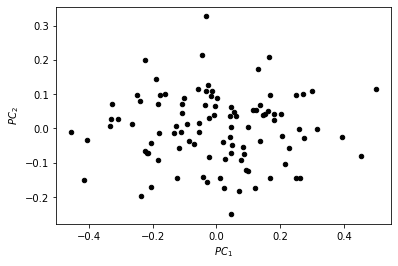

In [5]:
# Determine the values of PC1 and PC2 corresponding to each data point
datapca = pca.transform(data)
pc1,pc2 = datapca[:,0],datapca[:,1]
# Make a scatter plot of PC1 and PC2
plt.scatter(pc1,pc2,marker='o',s=20,color='black')
plt.xlabel(r'$PC_1$')
plt.ylabel(r'$PC_2$')

If we predict the $y$ values using only 1 principal component:

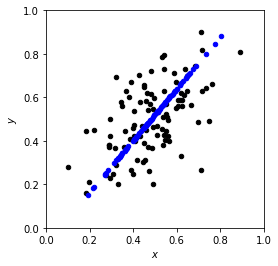

In [6]:
# Plot original dataset
plt.scatter(x,y,marker='o',s=20,color='black')
# Make a prediction of the dataset using just 1 of the 2 principal components
x1 = xmu + pc1[:]*v1[0]
y1 = ymu + pc1[:]*v1[1]
# Plot the prediction, which roughly models the original dataset along the principal eigenvector
# This is just a simple 2D example -- this technique is more powerful in higher dimensions
plt.scatter(x1,y1,marker='o',s=20,color='blue')
# Complete the plot
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.gca().set_aspect('equal', adjustable='box')

## Activity

Perform a Principal Component Analysis on the provided dataset of SDSS quasar magnitudes.   How many principal components are needed to explain 90% of the variance?

## Interpolation

We may wish to use our model to predict outcome values in between the positions of our data points ("**interpolation**").  There are various possible approaches to this, depending on what assumptions we want to make about the properties of the interpolating function.

Let's consider the following example:

(-10.0, 15.0)

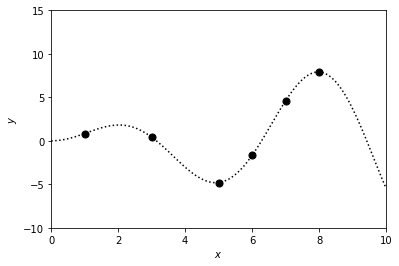

In [7]:
# Set range of plot
xmin,xmax = 0.,10.
ymin,ymax = -10.,15.
# Fine grid of x-values for the underlying model
xmod = np.linspace(xmin,xmax,100)
# The underlying model is y = x * sin x
ymod = xmod*np.sin(xmod)
# Sample a dataset from the underlying model
xp = np.array([1.,3.,5.,6.,7.,8.])
yp = xp*np.sin(xp)
# Plot the underlying model and the dataset
plt.plot(xmod,ymod,color='black',linestyle='dotted')
plt.scatter(xp,yp,marker='o',s=50,color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

Linear interpolation and cubic spline interpolation:

(-10.0, 15.0)

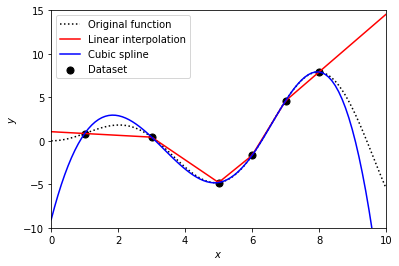

In [8]:
from scipy import interpolate
# Reconstruct the function between the data points using linear interpolation
flin = interpolate.interp1d(xp,yp,kind='linear',bounds_error=False,fill_value='extrapolate')
ylin = flin(xmod)
# Reconstruct the function between the data points using cubic spline interpolation
tck = interpolate.splrep(xp,yp)
ycube = interpolate.splev(xmod,tck)
# Compare these reconstructions to the underlying model
plt.plot(xmod,ymod,color='black',linestyle='dotted',label='Original function')
plt.scatter(xp,yp,marker='o',s=50,color='black',label='Dataset')
plt.plot(xmod,ylin,color='red',label='Linear interpolation')
plt.plot(xmod,ycube,color='blue',label='Cubic spline')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

These approaches don't provide an error in the interpolation.

Another approach is to model the function using a **Gaussian process** (which is also known as **kriging** in some fields).  In so doing, we're imposing a statistical model for the correlations in the function (a "smoothness prior").

Here is an implementation of a Gaussian process for the above dataset:

(-10.0, 15.0)

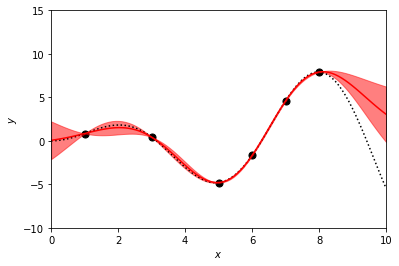

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel,ConstantKernel
# Set up the kernel for the Gaussian process
kernel = ConstantKernel(1.)*RBF(1.)
# Create the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10)
xp2 = xp.reshape(-1,1)
gp.fit(xp2,yp)
# Sample the Gaussian process and confidence interval at each value of x
xmod2 = xmod.reshape(-1,1)
ygp,ygperr = gp.predict(xmod2,return_std=True)
# Plot the result
plt.plot(xmod,ymod,color='black',linestyle='dotted')
plt.scatter(xp,yp,marker='o',s=50,color='black')
plt.fill_between(xmod,ygp-ygperr,ygp+ygperr,color='red',alpha=0.5)
plt.plot(xmod,ygp,color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

A Gaussian process can also propagate **noise** in the data into an **error in the prediction**:

(-10.0, 15.0)

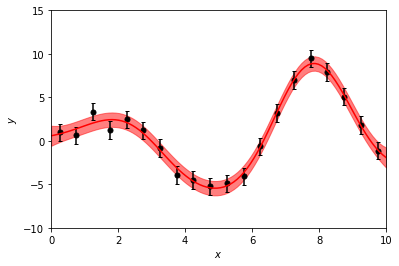

In [10]:
# Create a noisy dataset sampled from the model y = x * sin x
sig = 1. # value of standard deviation
nx = 20 # number of data points to sample
dx = (xmax-xmin)/nx
xn = np.linspace(xmin+0.5*dx,xmax-0.5*dx,nx) # x-values of the data points
yn = xn*np.sin(xn) + sig*np.random.normal(size=nx) # y-values are the model plus noise
# Kernel for the Gaussian process including noise (which is defined as a variance)
kernel = ConstantKernel(1.)*RBF(1.) + WhiteKernel(sig**2)
# Create the Gaussian process
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10)
xn2 = xn.reshape(-1,1)
gp.fit(xn2,yn)
# Sample the Gaussian process and confidence interval at each value of x
xmod2 = xmod.reshape(-1,1)
ygp,ygperr = gp.predict(xmod2,return_std=True)
# Plot the result
plt.plot(xn,yn,marker='o',markersize=5,color='black',linestyle='None')
plt.errorbar(xn,yn,yerr=np.repeat(sig,nx),color='black',capsize=2.,linestyle='None')
plt.fill_between(xmod,ygp-ygperr,ygp+ygperr,color='red',alpha=0.5)
plt.plot(xmod,ygp,color='red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

## Activity

Let's return to the supernova distance-redshift dataset from Class 3.  _Fit a Gaussian process model to this dataset to predict the distance modulus and its error at any redshift_